# Assignment Four: 1/8/25

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df = pd.read_excel(r"E:\AIML College\Assignment Four\50_Startups.xlsx")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.shape

(50, 5)

In [5]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [7]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

<Axes: >

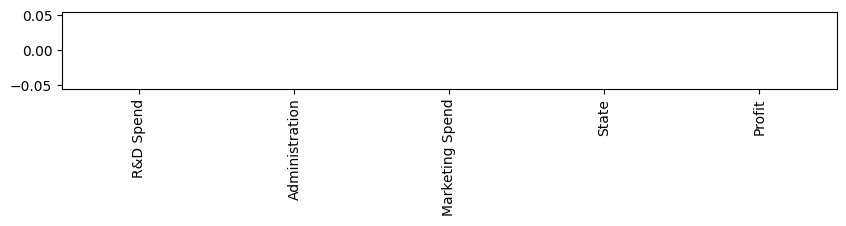

In [ ]:
#Checking for null values
df.isnull().sum().plot(kind="bar", figsize=(10,1))

In [11]:
df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [13]:
df["Profit"].value_counts()

Profit
192261.83    1
89949.14     1
105008.31    1
103282.38    1
101004.64    1
99937.59     1
97483.56     1
97427.84     1
96778.92     1
96712.80     1
96479.51     1
90708.19     1
81229.06     1
191792.06    1
81005.76     1
78239.91     1
77798.83     1
71498.49     1
69758.98     1
65200.33     1
64926.08     1
49490.75     1
42559.73     1
35673.41     1
105733.54    1
107404.34    1
108552.04    1
108733.99    1
191050.39    1
182901.99    1
166187.94    1
156991.12    1
156122.51    1
155752.60    1
152211.77    1
149759.96    1
146121.95    1
144259.40    1
141585.52    1
134307.35    1
132602.65    1
129917.04    1
126992.93    1
125370.37    1
124266.90    1
122776.86    1
118474.03    1
111313.02    1
110352.25    1
14681.40     1
Name: count, dtype: int64

In [15]:
df["Profit"].value_counts().sum()

50

In [ ]:
#Dropping the first row from the dataset ie: State New York
df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [20]:
df = df.drop(0).reset_index(drop=True)
df.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,153441.51,101145.55,407934.54,Florida,191050.39
1,144372.41,118671.85,383199.62,New York,182901.99
2,142107.34,91391.77,366168.42,Florida,166187.94
3,131876.90,99814.71,362861.36,New York,156991.12
4,134615.46,147198.87,127716.82,California,156122.51


<Axes: xlabel='Profit', ylabel='State'>

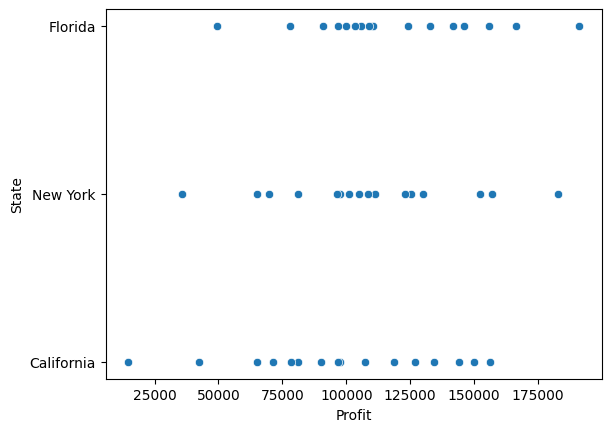

In [21]:
sns.scatterplot(data=df, y="State", x="Profit")

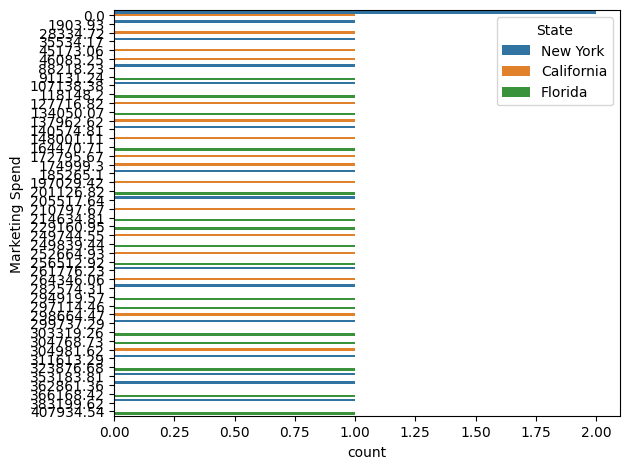

In [43]:
sns.countplot(data=df, y="Marketing Spend", hue="State") #Showing the count of marketing spend for each state
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [30]:
state_sales = df.groupby("State")["Profit"].sum().sort_values(ascending=False).head(10).reset_index()
fig = px.bar(state_sales, x="State", y="Profit", title="Top 10 States vs Profit", color_discrete_sequence=px.colors.qualitative.Alphabet_r)
fig.show()
#Florida being the Highest profitable state

<function matplotlib.pyplot.show(close=None, block=None)>

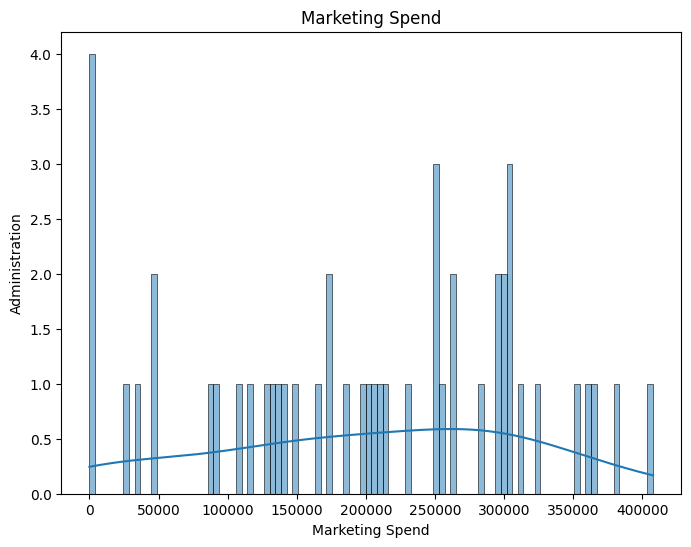

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='Marketing Spend', kde=True, bins=100)
plt.title("Marketing Spend")
plt.ylabel("Administration")
plt.show
#Showing the Marketing Spend vs Administration 

In [32]:
df.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,153441.51,101145.55,407934.54,Florida,191050.39
1,144372.41,118671.85,383199.62,New York,182901.99
2,142107.34,91391.77,366168.42,Florida,166187.94
3,131876.90,99814.71,362861.36,New York,156991.12
4,134615.46,147198.87,127716.82,California,156122.51


<function matplotlib.pyplot.show(close=None, block=None)>

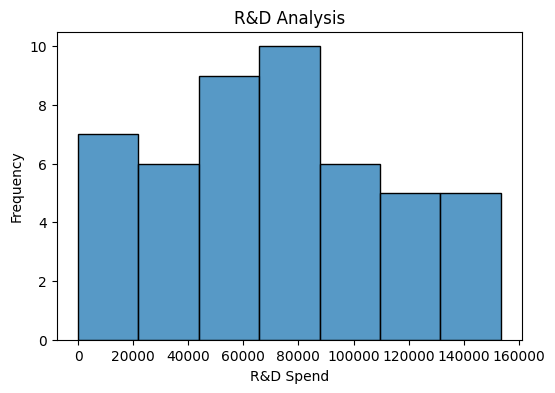

In [ ]:
#R&D Analysis
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='R&D Spend')
plt.title("R&D Analysis")
plt.ylabel("Frequency")
plt.show

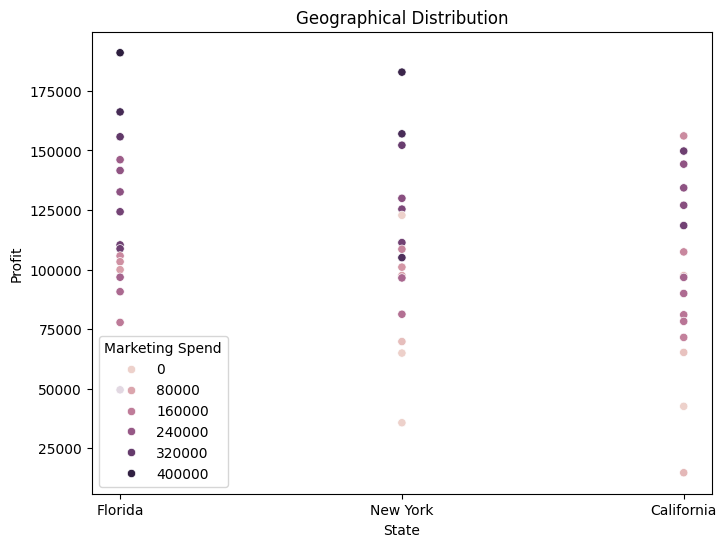

In [36]:
#For Geographical Distribution
plt.figure(figsize=(8,6))
sns.scatterplot(data = df, x="State", y="Profit", hue="Marketing Spend")
plt.title("Geographical Distribution")
plt.show()